In [1]:
import numpy as np
import pandas as pd

In [2]:
x=np.array([2,3,5,7,9])
y=np.array([4,5,7,10,15])

In [5]:
df = pd.DataFrame()
df['x'] = pd.DataFrame(x)
df['y'] = pd.DataFrame(y)

In [6]:
df

,x,y
0,2,4
1,3,5
2,5,7
3,7,10
4,9,15


In [7]:
x_mean = sum(df['x'])/len(df['x'])
y_mean = sum(df['y'])/len(df['y'])
print(x_mean)
print(y_mean)

5.2
8.2


In [8]:
df['x-X'] = df['x'].apply(lambda data : data-x_mean)

In [9]:
df['y-Y'] = df['y'].apply(lambda data : data-y_mean)

In [10]:
df['sq_x-X'] = df['x-X'].apply(lambda data : data*data)

In [11]:
df['mul_x-X_y-Y'] = df['x-X']*df['y-Y']

In [12]:
df

,x,y,x-X,y-Y,sq_x-X,mul_x-X_y-Y
0,2,4,-3.2,-4.2,10.24,13.44
1,3,5,-2.2,-3.2,4.84,7.04
2,5,7,-0.2,-1.2,0.04,0.24
3,7,10,1.8,1.8,3.24,3.24
4,9,15,3.8,6.8,14.44,25.84


In [13]:
m = (sum(df['x-X']*df['y-Y']))/sum(df['sq_x-X'])
m

1.518292682926829

In [14]:
#y_mean = m*x_mean+c
c = y_mean-(m*x_mean)
print(c)

0.30487804878048763


In [15]:
df['pred'] = df['x'].apply(lambda data : (m*data)+c)
df

,x,y,x-X,y-Y,sq_x-X,mul_x-X_y-Y,pred
0,2,4,-3.2,-4.2,10.24,13.44,3.341463
1,3,5,-2.2,-3.2,4.84,7.04,4.859756
2,5,7,-0.2,-1.2,0.04,0.24,7.896341
3,7,10,1.8,1.8,3.24,3.24,10.932927
4,9,15,3.8,6.8,14.44,25.84,13.969512


In [16]:
df['diff'] = df['pred']-df['y']
df

,x,y,x-X,y-Y,sq_x-X,mul_x-X_y-Y,pred,diff
0,2,4,-3.2,-4.2,10.24,13.44,3.341463,-0.658537
1,3,5,-2.2,-3.2,4.84,7.04,4.859756,-0.140244
2,5,7,-0.2,-1.2,0.04,0.24,7.896341,0.896341
3,7,10,1.8,1.8,3.24,3.24,10.932927,0.932927
4,9,15,3.8,6.8,14.44,25.84,13.969512,-1.030488


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

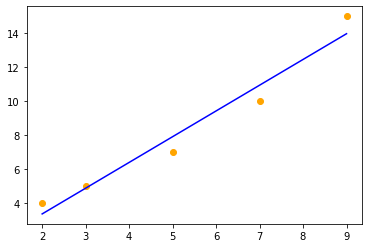

In [18]:
plt.plot(df['x'],df['pred'],color="blue")
plt.scatter(df['x'],df['y'], color="orange")
plt.show()

In [19]:
df['pred-Y'] = df['pred']-y_mean
df

,x,y,x-X,y-Y,sq_x-X,mul_x-X_y-Y,pred,diff,pred-Y
0,2,4,-3.2,-4.2,10.24,13.44,3.341463,-0.658537,-4.858537
1,3,5,-2.2,-3.2,4.84,7.04,4.859756,-0.140244,-3.340244
2,5,7,-0.2,-1.2,0.04,0.24,7.896341,0.896341,-0.303659
3,7,10,1.8,1.8,3.24,3.24,10.932927,0.932927,2.732927
4,9,15,3.8,6.8,14.44,25.84,13.969512,-1.030488,5.769512


In [20]:
df['sq_pred-Y'] = df['pred-Y']*df['pred-Y']
df

,x,y,x-X,y-Y,sq_x-X,mul_x-X_y-Y,pred,diff,pred-Y,sq_pred-Y
0,2,4,-3.2,-4.2,10.24,13.44,3.341463,-0.658537,-4.858537,23.605378
1,3,5,-2.2,-3.2,4.84,7.04,4.859756,-0.140244,-3.340244,11.157229
2,5,7,-0.2,-1.2,0.04,0.24,7.896341,0.896341,-0.303659,0.092209
3,7,10,1.8,1.8,3.24,3.24,10.932927,0.932927,2.732927,7.468889
4,9,15,3.8,6.8,14.44,25.84,13.969512,-1.030488,5.769512,33.287271


In [21]:
df['sq_y-Y'] = df['y-Y']*df['y-Y']
df

,x,y,x-X,y-Y,sq_x-X,mul_x-X_y-Y,pred,diff,pred-Y,sq_pred-Y,sq_y-Y
0,2,4,-3.2,-4.2,10.24,13.44,3.341463,-0.658537,-4.858537,23.605378,17.64
1,3,5,-2.2,-3.2,4.84,7.04,4.859756,-0.140244,-3.340244,11.157229,10.24
2,5,7,-0.2,-1.2,0.04,0.24,7.896341,0.896341,-0.303659,0.092209,1.44
3,7,10,1.8,1.8,3.24,3.24,10.932927,0.932927,2.732927,7.468889,3.24
4,9,15,3.8,6.8,14.44,25.84,13.969512,-1.030488,5.769512,33.287271,46.24


In [22]:
r_square = 1-(sum(df['sq_pred-Y'])/sum(df['sq_y-Y']))
print(r_square)

0.04046985266807002
